In [8]:
from tensorflow import keras

In [9]:
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [10]:
X_train = train_images
y_train = train_labels
X_test = test_images
y_test = test_labels

In [11]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [12]:
cifar10_classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
import matplotlib.pyplot as plt
import numpy as np

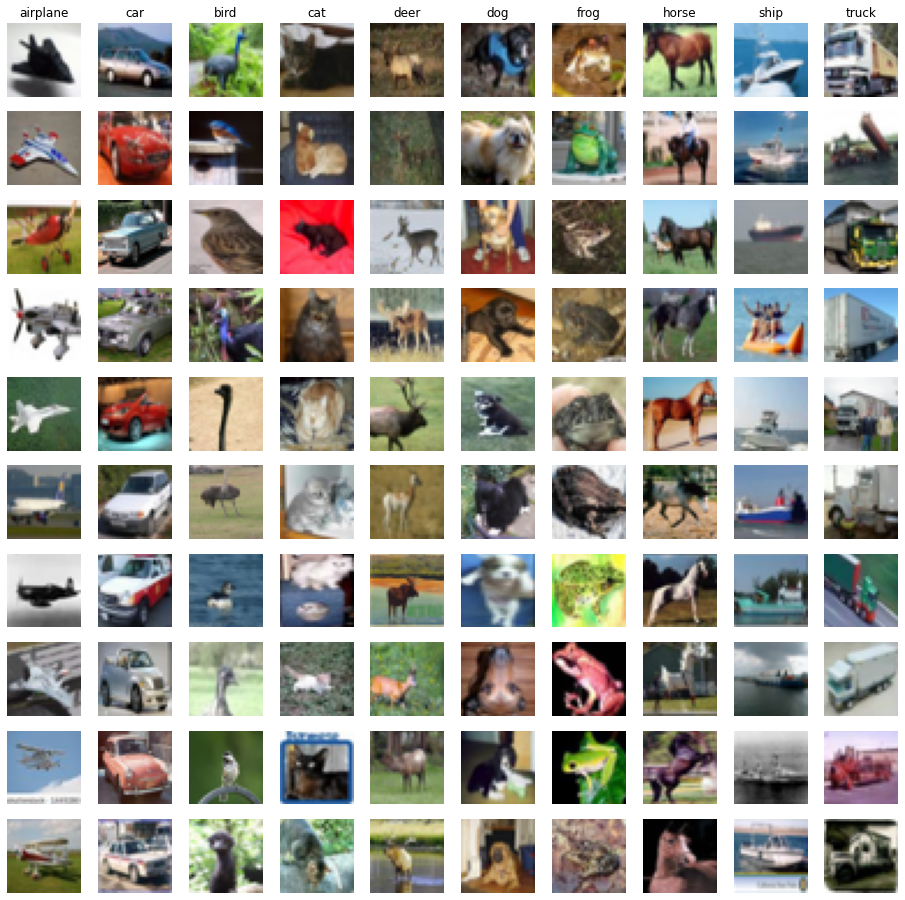

In [14]:
fig, ax = plt.subplots(10, len(cifar10_classes), figsize=(16, 16))
                       
for class_id, class_name in enumerate(cifar10_classes):
    indexes = np.where(y_train==class_id)[0][:10]
    for i, id in enumerate(indexes):
        ax[i, class_id].imshow(X_train[id])
        ax[i, class_id].axis('off')
        ax[0, class_id].set_title(class_name)

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(cifar10_classes), activation='softmax')
])

In [16]:
from tensorflow.keras.optimizers import SGD

In [17]:
learning_rate = 0.0003
optimizer = SGD(learning_rate)
loss_function = keras.losses.SparseCategoricalCrossentropy(from_logits=False)

In [18]:
model.compile(optimizer=optimizer,
              loss=loss_function,
              metrics=['accuracy'])  

In [19]:
random_state = 42

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=random_state)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
    epochs=100,  
    validation_data=(X_val, y_val),  
    callbacks=None,  
    verbose=1)  

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
print(y_test[1])
print(model.predict(X_test[:1]))

# Using Early Stopping

In [ ]:
callbacks = [keras.callbacks.EarlyStopping(patience=3, verbose=1)]

history = model.fit(X_train, y_train,
    epochs=100,  
    validation_data=(X_val, y_val),  
    callbacks=callbacks,  
    verbose=1)  

#  Convolution

In [29]:
model = keras.Sequential([
    keras.layers.Conv2D(input_shape=(32, 32, 3), filters = 16, kernel_size=3, activation='relu'),
    keras.layers.Conv2D(filters = 32, kernel_size=3, activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(cifar10_classes), activation='softmax')
])

In [30]:
optimizer = SGD()
loss_function = keras.losses.SparseCategoricalCrossentropy()

In [31]:
model.compile(optimizer=optimizer,
              loss=loss_function,
              metrics=['accuracy'])  

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                401472    
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

In [33]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, verbose=1)]

history = model.fit(X_train, y_train,
    batch_size=256,
    epochs=100,  
    validation_data=(X_val, y_val),  
    callbacks=callbacks,  
    verbose=1)  

Epoch 1/100
176/176 [==============================] - 25s 139ms/step - loss: 4.6571 - accuracy: 0.0979 - val_loss: 2.3024 - val_accuracy: 0.0952
Epoch 2/100
176/176 [==============================] - 24s 133ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3025 - val_accuracy: 0.0952
Epoch 3/100
176/176 [==============================] - 22s 123ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3025 - val_accuracy: 0.0954
Epoch 4/100
 65/176 [==========>...................] - ETA: 13s - loss: 2.3028 - accuracy: 0.0943

KeyboardInterrupt: 

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(input_shape=(32, 32, 3), filters = 16, kernel_size=3, activation='relu', padding='same'),
    keras.layers.Conv2D(filters = 16, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(filters = 32, kernel_size=3, activation='relu', padding='same'),
    keras.layers.Conv2D(filters = 32, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(filters = 64, kernel_size=3, activation='relu',padding='same'),
    keras.layers.Conv2D(filters = 64, kernel_size=3, activation='relu',padding='same'),
    keras.layers.Conv2D(filters = 64, kernel_size=3, activation='relu',padding='same'),
    keras.layers.MaxPool2D(),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(cifar10_classes), activation='softmax')
])

In [ ]:
model.compile(optimizer=optimizer,
              loss=loss_function,
              metrics=['accuracy'])  

In [ ]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, verbose=1)]

history = model.fit(X_train, y_train,
    batch_size=256,
    epochs=100,  
    validation_data=(X_val, y_val),  
    callbacks=callbacks,  
    verbose=1) 

# Global Avreage Pooling

In [1]:
model = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size=3, activation='relu', padding='same'),
    keras.layers.Conv2D(filters = 32, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(filters = 128, kernel_size=3, activation='relu',padding='same'),
    keras.layers.Conv2D(filters = 128, kernel_size=3, activation='relu',padding='same'),
    keras.layers.MaxPool2D(),
    
    
    keras.layers.GlobalAveragePooling2D()
    keras.layers.Dense(len(cifar10_classes), activation='softmax')
])

NameError: name 'keras' is not defined

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(),
              loss=loss_function,
              metrics=['accuracy'])  

In [ ]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, verbose=1)]

history = model.fit(X_train, y_train,
    batch_size=256,
    epochs=100,  
    validation_data=(X_val, y_val),  
    callbacks=callbacks,  
    verbose=1)

# Non-Sequential (Resblock)

In [ ]:
from tensorflow.keras.models import Model

input_ = keras.layers.Input((32, 32, 3))
output = keras.layers.Flatten()(input_)
output = keras.layers.Dense(512, activation='relu')(output)
output = keras.layers.Dense(256, activation='relu')(output)
output = keras.layers.Dense(128, activation='relu')(output)
model = Model(inputs=input_, outputs=output)

model.summary()

In [3]:
def create_resblock(input_layer: keras.layers.Layer, nb_filters: int, conv_kernel_size: int) -> keras.layers.Layer:
    x = keras.layers.Conv2D(nb_filters, conv_kernel, padding='same')(input_layer)
    x = kers.layers.BatchNormalization()(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.Conv2D(nb_filters, conv_kernel, padding='same')(x)
    x = kers.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x, input_layer])
    return keras.layers.ReLU()(x)

NameError: name 'keras' is not defined

In [ ]:
input_ = keras.layers.Input((32,32,3))
x = create_resblock(x, 64, 3)
x = create_resblock(x, 64, 3)
x = keras.layers.GlobalAvreagePooling2D()(x)
x = keras.layers.Dense(len(cifar10_classes), activation='softmax')(x)

model = keras.Model(inputs=input_, outputs=x)